In [31]:
import pandas as pd
import sys



!pip install https://sparkflows-release.s3.amazonaws.com/fire/jupyter-docker/firenotebookwheel/fire_notebook-3.1.0-py3-none-any.whl
from fire_notebook.output.workflowcontext import RestWorkflowContext

  Using cached https://sparkflows-release.s3.amazonaws.com/fire/jupyter-docker/firenotebookwheel/fire_notebook-3.1.0-py3-none-any.whl (1.3 MB)

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


In [74]:
if len(sys.argv) > 1:
    restworkflowcontext = RestWorkflowContext(parameters=parameters_list)
else:
    restworkflowcontext = RestWorkflowContext(debug=False)

In Debug Mode!


In [75]:
pd.set_option('display.max_columns', None)

In [76]:
df = pd.read_csv('/Users/dhruv/Downloads/campaign.csv')

In [35]:
df.shape

(7740, 36)

In [36]:
# --var selectOperation1=eda1 
# --var description_arg=TypeA 
# --var coupontype_arg=instore_discount 
# --var agegroup_arg=25-34 
# --var maritalstatus_arg=% 
# --var incomegroup_arg=% 
# --var homeowner_arg=% 
# --var hhcomp_arg=% 
# --var householdsize_from=0 
# --var householdsize_to=2

In [37]:
df.head()

,household_id,PRODUCT_ID,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,basket_id,week_no,day,transaction_time,store_id,campaign_coupon_discount,manuf_coupon_discount,units,amount_list,manuf_coupon_match_discount,total_coupon_discount,instore_discount,amount_paid,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,redemption_type,campaign_availed_day,discount_availed,sales_during_campaign
0,105,835715,1,TypeB,346,383,407,GROCERY,National,FRUIT - SHELF STABLE,PEACHES,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-34,B,Under 15K,Homeowner,1 Adult Kids,3,2,no_discount,na,not_redeemed,0.0
1,513,1095329,2,TypeB,351,383,282,GROCERY,National,FRZN VEGETABLE/VEG DSH,FRZN BOXED VEGETABLES - PLAIN,10 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,U,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,no_discount,na,not_redeemed,0.0
2,98,936270,3,TypeC,356,412,69,DRUG GM,Private,SINUS AND ALLERGY,SINUS AND ALLERGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35-44,U,35-49K,Unknown,1 Adult Kids,2,1,private_label,na,not_redeemed,0.0
3,321,937489,4,TypeB,372,404,531,GROCERY,National,BAKING NEEDS,BITS & MORSELS,11.5 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,no_discount,na,not_redeemed,0.0
4,329,908064,4,TypeB,372,404,1225,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-34,U,75-99K,Unknown,Single Female,1,None/Unknown,no_discount,na,not_redeemed,0.0


In [38]:
#parameters_list = [
#    "placeholder",
#    "http://localhost",  # webserverURL
#    "00001",  # jobId
#    "description_arg=TypeA,coupontype_arg=%,agegroup_arg=%,maritalstatus=%,incomegroup_arg=%,homeowner_arg=%,hhcomp_arg=%,householdsize_from=0,householdsize_to=6"
#]

#restworkflowcontext = RestWorkflowContext(parameters=parameters_list)

parameters_list = sys.argv
restworkflowcontext = RestWorkflowContext(parameters=parameters_list)

description_arg = restworkflowcontext.getParmeters(parameter_name="description_arg", default="%")
coupontype_arg = restworkflowcontext.getParmeters(parameter_name="coupontype_arg", default="%")
agegroup_arg = restworkflowcontext.getParmeters(parameter_name="agegroup_arg", default="%")
maritalstatus = restworkflowcontext.getParmeters(parameter_name="maritalstatus", default="%")
incomegroup_arg = restworkflowcontext.getParmeters(parameter_name="incomegroup_arg", default="%")
homeowner_arg = restworkflowcontext.getParmeters(parameter_name="homeowner_arg", default="%")
hhcomp_arg = restworkflowcontext.getParmeters(parameter_name="hhcomp_arg", default="%")
householdsize_from = restworkflowcontext.getParmeters(parameter_name="householdsize_from", default="0")
householdsize_to = restworkflowcontext.getParmeters(parameter_name="householdsize_to", default="6")

# Output the values
print(f"description_arg: {description_arg}")
print(f"coupontype_arg: {coupontype_arg}")
print(f"agegroup_arg: {agegroup_arg}")
print(f"maritalstatus: {maritalstatus}")
print(f"incomegroup_arg: {incomegroup_arg}")
print(f"homeowner_arg: {homeowner_arg}")
print(f"hhcomp_arg: {hhcomp_arg}")
print(f"householdsize_from: {householdsize_from}")
print(f"householdsize_to: {householdsize_to}")

message="20"
restworkflowcontext.outputProgress(id=9, title="Progress", progress=message)

In Debug Mode!
description_arg: %
coupontype_arg: %
agegroup_arg: %
maritalstatus: %
incomegroup_arg: %
homeowner_arg: %
hhcomp_arg: %
householdsize_from: 0
householdsize_to: 6
Progress: 20


In [57]:
# Function to apply filters only if the parameter list does not contain "%" (meaning no filter)
def apply_filter(column, param_list):
    if "%" in param_list:  # Skip filtering if "%" is in the param list
        return True
    else:
        return column.fillna("").apply(lambda x: any(param.lower() in str(x).lower() for param in param_list))

# Example parameters as lists, where "%" means no filtering
description_list = [description_arg] if description_arg != "%" else ["%"]
agegroup_list = [agegroup_arg] if agegroup_arg != "%" else ["%"]
maritalstatus_list = [maritalstatus] if maritalstatus != "%" else ["%"]
incomegroup_list = [incomegroup_arg] if incomegroup_arg != "%" else ["%"]
homeowner_list = [homeowner_arg] if homeowner_arg != "%" else ["%"]
hhcomp_list = [hhcomp_arg] if hhcomp_arg != "%" else ["%"]
coupontype_list = [coupontype_arg] if coupontype_arg != "%" else ["%"]


# Ensure household size is provided directly
householdsize_from = int(householdsize_from)
householdsize_to = int(householdsize_to)

# Convert 'HOUSEHOLD_SIZE_DESC' to numeric, invalid parsing will be set as NaN
df['HOUSEHOLD_SIZE_DESC'] = pd.to_numeric(df['HOUSEHOLD_SIZE_DESC'], errors='coerce')


# Apply filters to the DataFrame using lists
filtered_df = df[
    (apply_filter(df['DESCRIPTION'], description_list)) &
    (apply_filter(df['AGE_DESC'], agegroup_list)) &
    (apply_filter(df['MARITAL_STATUS_CODE'], maritalstatus_list)) &
    (apply_filter(df['INCOME_DESC'], incomegroup_list)) &
    (apply_filter(df['HOMEOWNER_DESC'], homeowner_list)) &
    (apply_filter(df['HH_COMP_DESC'], hhcomp_list)) &
    (df['HOUSEHOLD_SIZE_DESC'].between(householdsize_from, householdsize_to, inclusive='both')) &
    (apply_filter(df['redemption_type'], coupontype_list))
]
print(filtered_df.shape)
# print(filtered_df.head(5))
restworkflowcontext.outPandasDataframe(id=9, title="Names", df=filtered_df, num_rows=5)
# restworkflowcontext.outPandasDataframe(9, "Names", filtered_df)

(7173, 36)


,household_id,PRODUCT_ID,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,basket_id,week_no,day,transaction_time,store_id,campaign_coupon_discount,manuf_coupon_discount,units,amount_list,manuf_coupon_match_discount,total_coupon_discount,instore_discount,amount_paid,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,redemption_type,campaign_availed_day,discount_availed,sales_during_campaign
0,105,835715,1,TypeB,346,383,407,GROCERY,National,FRUIT - SHELF STABLE,PEACHES,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-34,B,Under 15K,Homeowner,1 Adult Kids,3.0,2,no_discount,na,not_redeemed,0.0
1,513,1095329,2,TypeB,351,383,282,GROCERY,National,FRZN VEGETABLE/VEG DSH,FRZN BOXED VEGETABLES - PLAIN,10 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,U,75-99K,Homeowner,2 Adults No Kids,2.0,None/Unknown,no_discount,na,not_redeemed,0.0
2,98,936270,3,TypeC,356,412,69,DRUG GM,Private,SINUS AND ALLERGY,SINUS AND ALLERGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35-44,U,35-49K,Unknown,1 Adult Kids,2.0,1,private_label,na,not_redeemed,0.0
3,321,937489,4,TypeB,372,404,531,GROCERY,National,BAKING NEEDS,BITS & MORSELS,11.5 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,A,100-124K,Homeowner,2 Adults No Kids,2.0,None/Unknown,no_discount,na,not_redeemed,0.0
4,329,908064,4,TypeB,372,404,1225,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-34,U,75-99K,Unknown,Single Female,1.0,None/Unknown,no_discount,na,not_redeemed,0.0


''

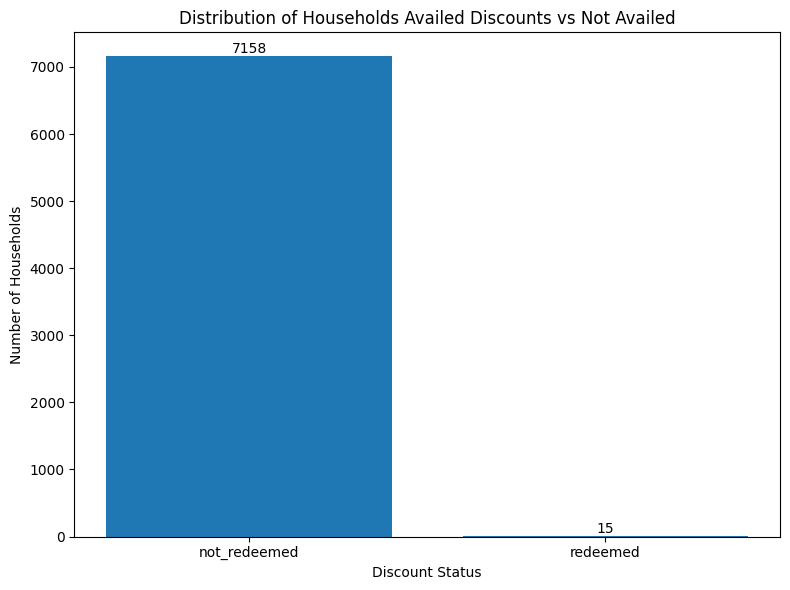

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data to count households based on whether they availed discounts or not
df = filtered_df
discount_counts = df.groupby('discount_availed')['household_id'].count().reset_index()
discount_counts.columns = ['Discount Status', 'Household Count']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(discount_counts['Discount Status'], discount_counts['Household Count'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom')

# Titles and labels
plt.title('Distribution of Households Availed Discounts vs Not Availed')
plt.xlabel('Discount Status')
plt.ylabel('Number of Households')

# Optional: set consistent tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save to a file or display inline
plt.tight_layout()
# plt.show()


#restworkflowcontext.outDataframeChart(title= "Distribution of Households Availed Discounts vs Not Availed ", x_column = "c1", y_columns = ["c2"],
#                                  chart_type ="LINECHART", df = df, numRowsToDisplay = 10)
restworkflowcontext.outDataframeChart(
    title="Distribution of Households Availed Discounts vs Not Availed",
    x_column="Discount Status",
    y_columns=["Household Count"],
    chart_type="BARCHART",
    df=df,
    numRowsToDisplay=10
)

In [60]:
df = filtered_df
print()

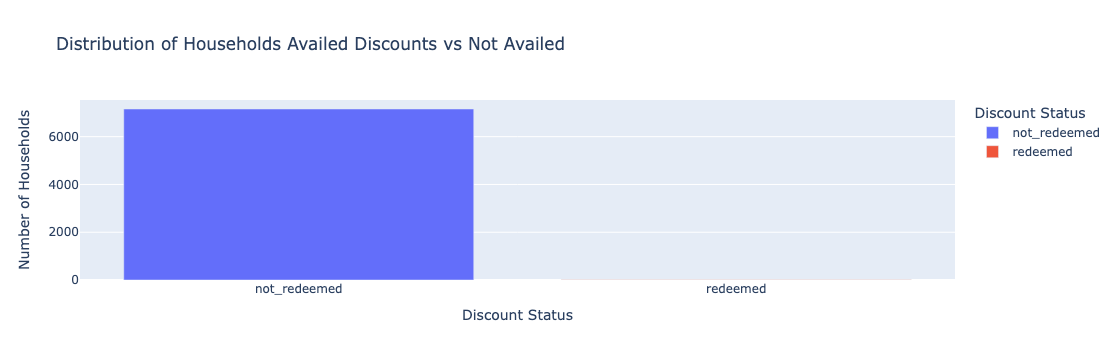

In [61]:

import pandas as pd
import plotly.express as px
import plotly

# Group data to count households based on whether they availed discounts or not
discount_counts = df.groupby('discount_availed')['household_id'].count().reset_index()
discount_counts.columns = ['Discount Status', 'Household Count']

# Create a stacked bar chart
fig = px.bar(
    discount_counts,
    x='Discount Status',
    y='Household Count',
    title='Distribution of Households Availed Discounts vs Not Availed',
    labels={'Discount Status': 'Discount Status', 'Household Count': 'Number of Households'},
    color='Discount Status',
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, "Distribution of Households Availed Discounts vs Not Availed", example_plotly)

fig.show()


## Campaign-wise Redemption of Coupons

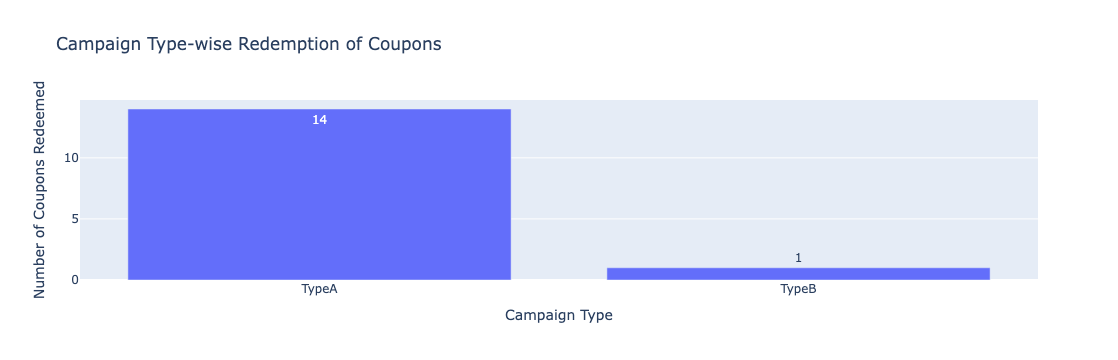

In [62]:
# Filter the data for redeemed coupons only
df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group by 'CAMPAIGN' and count the number of redeemed coupons
campaign_redemption = df_redeemed.groupby('DESCRIPTION').size().reset_index(name='Redemption Count')

fig = px.bar(
    campaign_redemption, 
    x='DESCRIPTION', 
    y='Redemption Count', 
    title='Campaign Type-wise Redemption of Coupons',
    labels={'DESCRIPTION': 'Campaign Type', 'Redemption Count': 'Number of Coupons Redeemed'},
    text_auto=True  # Display values on the bars
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, "Campaign Type-wise Redemption of Coupons", example_plotly)

fig.update_layout(xaxis_title='Campaign Type', yaxis_title='Number of Coupons Redeemed')

# Show the figure
# fig.show()


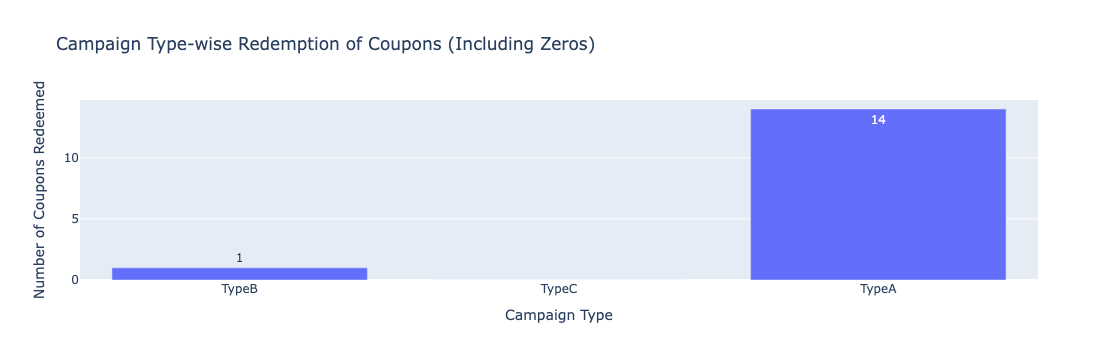

In [63]:
# Get all unique campaign descriptions
all_descriptions = df['DESCRIPTION'].unique()

# Filter the data for redeemed coupons only
df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group by 'DESCRIPTION' and count the number of redeemed coupons
campaign_redemption = df_redeemed.groupby('DESCRIPTION').size().reset_index(name='Redemption Count')

# Create a DataFrame with all campaign descriptions
all_campaigns = pd.DataFrame(all_descriptions, columns=['DESCRIPTION'])

# Merge the actual redemption counts with all campaign descriptions
campaign_redemption_complete = pd.merge(all_campaigns, campaign_redemption, on='DESCRIPTION', how='left')

campaign_redemption_complete['Redemption Count'] = campaign_redemption_complete['Redemption Count'].fillna(0)

fig = px.bar(
    campaign_redemption_complete, 
    x='DESCRIPTION', 
    y='Redemption Count', 
    title='Campaign Type-wise Redemption of Coupons (Including Zeros)',
    labels={'DESCRIPTION': 'Campaign Type', 'Redemption Count': 'Number of Coupons Redeemed'},
    text_auto=True 
)


fig.update_layout(xaxis_title='Campaign Type', yaxis_title='Number of Coupons Redeemed')

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, "Campaign Type-wise Redemption of Coupons", example_plotly)

# Show the figure
fig.show()


In [73]:
# Filter the data to include only redeemed coupons
df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group data by Campaign Description (DESCRIPTION) and Coupon Type (redemption_type) 
coupon_redemption = df_redeemed.groupby(['DESCRIPTION', 'redemption_type']).size().reset_index(name='Redemption Count')

fig = px.bar(
    coupon_redemption, 
    x='DESCRIPTION', 
    y='Redemption Count', 
    color='redemption_type', 
    title='Campaign Type-wise Redemption of Coupons',
    labels={'DESCRIPTION': 'Campaign Description', 'Redemption Count': 'Number of Coupons Redeemed', 'redemption_type': 'Coupon Type'},
    text_auto=True 
)

fig.update_layout(
    barmode='stack',
    xaxis_title='Campaign Description', 
    yaxis_title='Number of Coupons Redeemed'
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, "Campaign Type-wise Redemption of Coupons", example_plotly)

# Show the figure
# fig.show()


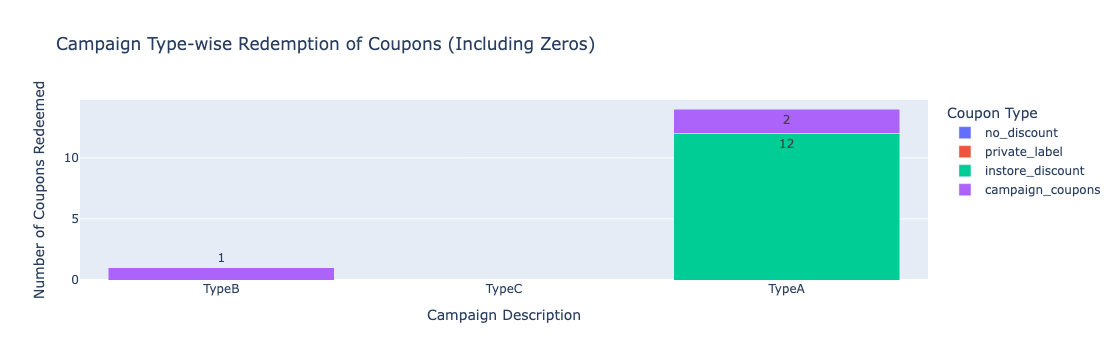

In [68]:
# Filter the data to include only redeemed coupons
df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group data by Campaign Description (DESCRIPTION) and Coupon Type (redemption_type) 
# to count the number of coupons redeemed per campaign
coupon_redemption = df_redeemed.groupby(['DESCRIPTION', 'redemption_type']).size().reset_index(name='Redemption Count')

# Get all unique values of 'DESCRIPTION' and 'redemption_type'
all_descriptions = df['DESCRIPTION'].unique()
all_coupon_types = df['redemption_type'].unique()

# Create a DataFrame with all combinations of DESCRIPTION and redemption_type
all_combinations = pd.MultiIndex.from_product([all_descriptions, all_coupon_types], names=['DESCRIPTION', 'redemption_type']).to_frame(index=False)

# Merge the actual data with the all_combinations DataFrame
coupon_redemption_complete = pd.merge(all_combinations, coupon_redemption, on=['DESCRIPTION', 'redemption_type'], how='left')

# Fill NaN values with 0 where there was no data (missing combinations will now have a count of 0)
coupon_redemption_complete['Redemption Count'] = coupon_redemption_complete['Redemption Count'].fillna(0)

# Create a stacked bar chart
fig = px.bar(
    coupon_redemption_complete, 
    x='DESCRIPTION', 
    y='Redemption Count', 
    color='redemption_type', 
    title='Campaign Type-wise Redemption of Coupons (Including Zeros)',
    labels={'DESCRIPTION': 'Campaign Description', 'Redemption Count': 'Number of Coupons Redeemed', 'redemption_type': 'Coupon Type'},
    text_auto=True  # Optional: Display values on the bars
)

# Customize the layout
fig.update_layout(
    barmode='stack',  # Stacked bars
    xaxis_title='Campaign Description', 
    yaxis_title='Number of Coupons Redeemed'
)

# Show the figure
# fig.show()


## Top 10 Product Categories Bought on Offer by Coupon Type

### No PRIVATE LABEL

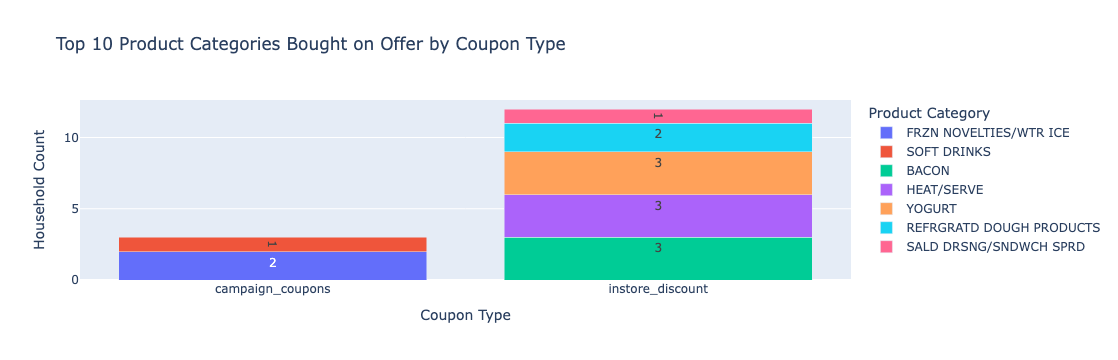

In [70]:
# Filter the data to include only redeemed coupons
df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group by coupon type (redemption_type) and product category (COMMODITY_DESC)
category_counts = df_redeemed.groupby(['redemption_type', 'COMMODITY_DESC']).size().reset_index(name='Household Count')

# Sort by the count of purchases and get the top 10 product categories per coupon type
top_10_categories = category_counts.groupby('redemption_type').apply(lambda x: x.nlargest(10, 'Household Count')).reset_index(drop=True)

# Create a stacked bar chart similar to the one in your image
fig = px.bar(
    top_10_categories, 
    x='redemption_type', 
    y='Household Count', 
    color='COMMODITY_DESC', 
    title='Top 10 Product Categories Bought on Offer by Coupon Type',
    labels={'redemption_type': 'Coupon Type', 'Household Count': 'Household Count', 'COMMODITY_DESC': 'Product Category'},
    text_auto=True
)

fig.update_layout(
    barmode='stack',
    xaxis_title='Coupon Type', 
    yaxis_title='Household Count',
    legend_title_text='Product Category'
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(id=9, title="Top 10 Product Categories Bought on Offer by Coupon Type", text=example_plotly)

# Show the figure
# fig.show()


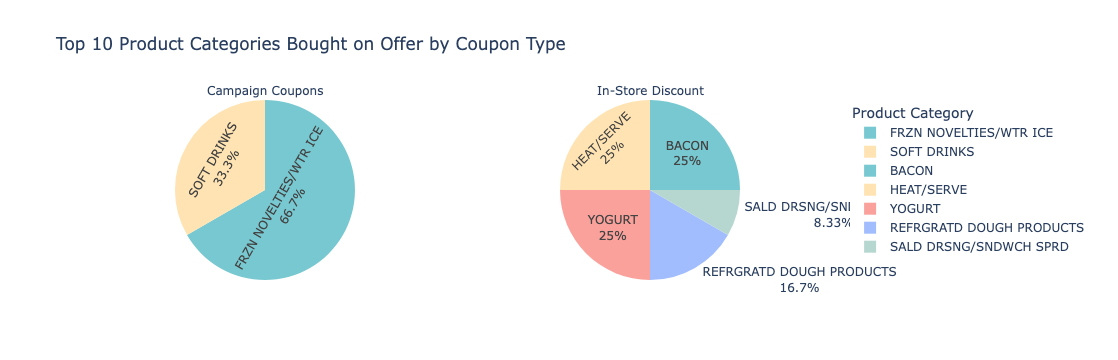

In [72]:
fig = px.pie(
    top_10_categories,
    names='COMMODITY_DESC',
    values='Household Count',
    color='COMMODITY_DESC',
    facet_col='redemption_type',  # keep facetting by coupon type
    title='Top 10 Product Categories Bought on Offer by Coupon Type',
    color_discrete_sequence=[
        '#77C8D0', '#FFE3B2', '#FAA19B', '#A1BDFD', '#B6D7D0',
        '#FFB2C8', '#FFD5BE', '#C7D2FF', '#83E3F4', '#D1BFFF',
        '#649BF7', '#F8C9EE', '#219AAD', '#FFBFA3'
    ],
    labels={
        'COMMODITY_DESC': 'Product Category',
        'redemption_type': 'Coupon Type',
        'Household Count': 'Household Count'
    }
)

# Making legend title 
fig.update_layout(legend_title_text='Product Category')

# Clean facet titles: 
pretty = {
    'instore_discount': 'In-Store Discount',
    'campaign_coupons': 'Campaign Coupons'
}
fig.for_each_annotation(lambda a: a.update(
    text=pretty.get(a.text.split('=')[-1], a.text.split('=')[-1].replace('_', ' ').title())
))


fig.update_traces(textinfo='percent+label')

# export
test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(id=9, title="Top 10 Product Categories Bought on Offer by Coupon Type (Pie)", text=example_plotly)
fig.show()


In [ ]:
# Filter the data to include only redeemed coupons

df_redeemed = df[df['discount_availed'] == 'redeemed']

# Group by product category (COMMODITY_DESC) and sum up the total household counts across all campaigns and coupon types
top_10_categories_total = df_redeemed.groupby('COMMODITY_DESC').size().nlargest(10).index

df_filtered = df_redeemed[df_redeemed['COMMODITY_DESC'].isin(top_10_categories_total)]

# Group by campaign description (DESCRIPTION), coupon type (redemption_type), and product category (COMMODITY_DESC)
category_counts = df_filtered.groupby(['DESCRIPTION', 'redemption_type', 'COMMODITY_DESC']).size().reset_index(name='Household Count')

# Get all unique combinations of DESCRIPTION and redemption_type
all_descriptions = df['DESCRIPTION'].unique()
all_coupon_types = df['redemption_type'].unique()

# Create a DataFrame with all possible combinations of DESCRIPTION, redemption_type, and the top 10 COMMODITY_DESC
all_combinations = pd.MultiIndex.from_product([all_descriptions, all_coupon_types, top_10_categories_total], names=['DESCRIPTION', 'redemption_type', 'COMMODITY_DESC']).to_frame(index=False)

# Merge the actual data with all_combinations to ensure all combinations are represented
complete_data = pd.merge(all_combinations, category_counts, on=['DESCRIPTION', 'redemption_type', 'COMMODITY_DESC'], how='left')

complete_data['Household Count'] = complete_data['Household Count'].fillna(0)

# Create a stacked bar chart
fig = px.bar(
    complete_data, 
    x='DESCRIPTION', 
    y='Household Count', 
    color='COMMODITY_DESC', 
    title='Top 10 Product Categories Bought on Offer by Campaign Type',
    labels={'DESCRIPTION': 'Campaign Type', 'Household Count': 'Number of Households', 'COMMODITY_DESC': 'Product Category'},
    text_auto=True
)

fig.update_layout(
    barmode='stack',
    xaxis_title='Campaign Type', 
    yaxis_title='Number of Households',
    legend_title_text='Product Category'
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Top 10 Product Categories Bought on Offer by Campaign Type", text=example_plotly)

# Show the figure
#fig.show()

message="100"
restworkflowcontext.outputProgress(9, title="Progress", progress=message)

message = "Job Execution Completed."
restworkflowcontext.outSuccess(9, title="Success", text=message)